Outliers: 50.0
Outliers: 20    50.0
Name: Value, dtype: float64
Outliers: 20   -8.1904
Name: Value, dtype: float64


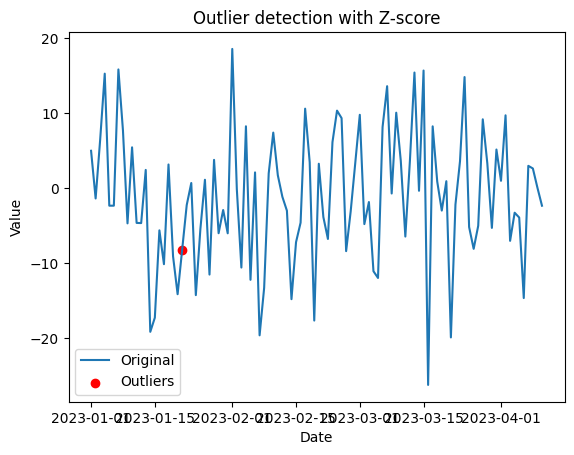

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

dates = pd.date_range(start = '2023-01-01', periods = 100, freq = 'D')
np.random.seed(42)
values = np.random.randn(100) * 10
values[20] = 50
data = pd.DataFrame({'Date': dates, "Value": values})

print("Outliers:", data.loc[20, 'Value'])

abs_zscores = np.abs(stats.zscore(data['Value']))
threshold = 3
outliers = abs_zscores > threshold

print("Outliers:", data.loc[outliers, 'Value'])

data.loc[outliers, 'Value'] = np.nan
data['Value'] = data['Value'].interpolate()

print("Outliers:", data.loc[outliers, 'Value'])

plt.plot(data['Date'], data['Value'], label = 'Original')
plt.scatter(data[outliers]['Date'], data[outliers]['Value'], color = 'red', label = 'Outliers')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Outlier detection with Z-score')
plt.legend()

plt.show()